<a href="https://colab.research.google.com/github/sul01/MSDS-CODE/blob/master/hw3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

In [1]:
import numpy as np
import pandas as pd

#loading
BITSTREAMVERA = pd.read_csv("https://raw.githubusercontent.com/CharlesColgan/MSDS-6350-6373-CODE/master/hw2/BITSTREAMVERA.csv")
CENTURY = pd.read_csv('https://raw.githubusercontent.com/sul01/MSDS-CODE/master/hw3/CENTURY.csv')
CONSOLAS = pd.read_csv("https://raw.githubusercontent.com/CharlesColgan/MSDS-6350-6373-CODE/master/hw2/CONSOLAS.csv")
EBRIMA = pd.read_csv("https://raw.githubusercontent.com/CharlesColgan/MSDS-6350-6373-CODE/master/hw2/EBRIMA.csv")
GILL = pd.read_csv('https://raw.githubusercontent.com/sul01/MSDS-CODE/master/hw3/GILL.csv')

#cleaning
drop_names = ["fontVariant","m_label","orientation","m_top","m_left","originalH","originalW","h","w"]
FONT = [BITSTREAMVERA, CENTURY, CONSOLAS, EBRIMA, GILL]; CL = []
for i in range(5):
  CL.append(FONT[i][(FONT[i]['strength']==0.4) & (FONT[i]['italic']==0)].drop(drop_names,axis=1))

#transforming
def fontToMatrix(font, df):
  for case in range(df.shape[0]):
    font[case] =  np.array(df[df.columns[3:]].iloc[case]).reshape(20,20)

FONT_mat = [] #font as 20x20 matrix
for i in range(5):
  FONT_mat.append(np.empty((CL[i].shape[0],20,20), int))
  fontToMatrix(FONT_mat[i], CL[i])

Examples

Bitstream



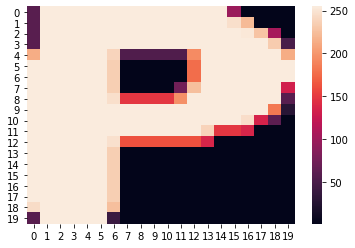

Century



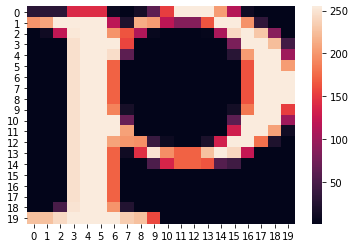

Consolas



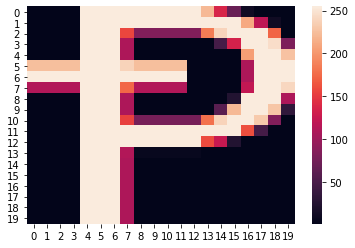

Ebrima



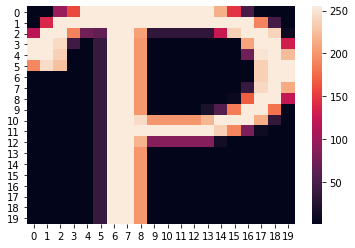

Gill



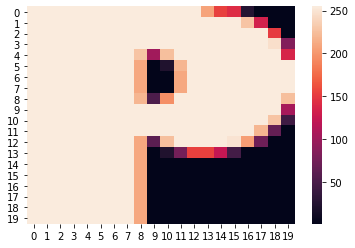

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

print('Bitstream\n');sns.heatmap(FONT_mat[0][8]);plt.show() 
print('Century\n');sns.heatmap(FONT_mat[1][199]);plt.show() 
print('Consolas\n');sns.heatmap(FONT_mat[2][26]);plt.show() 
print('Ebrima\n');sns.heatmap(FONT_mat[3][1387]);plt.show() 
print('Gill\n');sns.heatmap(FONT_mat[4][243]);plt.show() 

train/test split

In [3]:
from sklearn.model_selection import train_test_split

dataX = np.concatenate(([FONT_mat[i] for i in range(5)]))
dataY = np.concatenate(([CL[i]['font'] for i in range(5)]))
train, test = train_test_split(range(dataX.shape[0]), test_size = 0.2, random_state = 0)

x_train = dataX[train]; x_test = dataX[test]
y_train = dataY[train]; y_test = dataY[test]

(7809,)